#Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install -U pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=f919670898fcab1f1e7cc2ac36d89d8f3c8502fd39971f44137a356e16764823
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [3]:
from matplotlib import pyplot as plt
import plotly as py
import plotly.graph_objs as go 
import seaborn as sns
import pandas as pd
import pandasql as ps
import numpy as np
import plotly.tools as tls
from sklearn.model_selection import train_test_split
import math
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold


In [4]:
#Models import
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#import imputer:
from sklearn.impute import KNNImputer
from imblearn import under_sampling, over_sampling
#score
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score

# Data Pre-processing

 - Read the dataset


In [5]:
#Read the dataset and store it in a dataframe
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Startup Success Prediction/startup data.csv')
# df = pd.read_csv(r'startup data.csv')

In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)
#print the shape of the dataframe
print("Shape of the dataset", df.shape)
# print the first 5 instances and 
df.head()

Shape of the dataset (923, 49)


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [7]:
#printing number of rows and number of columns
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  923
Number of columns:  49


In [8]:
#printing the column names
print(df.columns)

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')


In [9]:
#printing the column names by pre defined function
df.columns.tolist()

['Unnamed: 0',
 'state_code',
 'latitude',
 'longitude',
 'zip_code',
 'id',
 'city',
 'Unnamed: 6',
 'name',
 'labels',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'state_code.1',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'category_code',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'object_id',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500',
 'status']

In [10]:
# Print out the information pertaining to the unique values in each of the columns
for x in df.columns:
    unique_vals = df[x].unique()
    if len(unique_vals) < 10:
        print("Number of unique values for the feature ",x," is ", len(unique_vals), "--->", unique_vals)
    else:
        print("Number of unique values for the feature ",x," is ", len(unique_vals))

Number of unique values for the feature  Unnamed: 0  is  923
Number of unique values for the feature  state_code  is  35
Number of unique values for the feature  latitude  is  652
Number of unique values for the feature  longitude  is  651
Number of unique values for the feature  zip_code  is  382
Number of unique values for the feature  id  is  922
Number of unique values for the feature  city  is  221
Number of unique values for the feature  Unnamed: 6  is  253
Number of unique values for the feature  name  is  922
Number of unique values for the feature  labels  is  2 ---> [1 0]
Number of unique values for the feature  founded_at  is  217
Number of unique values for the feature  closed_at  is  203
Number of unique values for the feature  first_funding_at  is  585
Number of unique values for the feature  last_funding_at  is  680
Number of unique values for the feature  age_first_funding_year  is  634
Number of unique values for the feature  age_last_funding_year  is  756
Number of un

In [11]:
# printing Basic infos (Non-null count and data type) per feature of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [12]:
#printing basic statistical infos per feature of the dataset
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [13]:
# investigate number of null values per features 
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [14]:
# to see what will happen if we drop but it will not actually drop the duplicate rows 
df.drop_duplicates()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [15]:
# how many elemetns are there
df.size

45227

In [16]:
df.max()

Unnamed: 0                            1153
state_code                              WV
latitude                           59.3352
longitude                          18.0571
zip_code                    Maryland 21045
id                                   c:997
city                               Zeeland
name                                 xkoto
labels                                   1
founded_at                        9/9/2010
first_funding_at                  9/9/2009
last_funding_at                   9/9/2011
age_first_funding_year             21.8959
age_last_funding_year              21.8959
age_first_milestone_year           24.6849
age_last_milestone_year            24.6849
relationships                           63
funding_rounds                          10
funding_total_usd               5700000000
milestones                               8
is_CA                                    1
is_NY                                    1
is_MA                                    1
is_TX      

In [17]:
print(df.columns.tolist())

['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']


In [18]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342




*   **Analysis results in the dataset used there are Missing Values among them are**


> * **Total Missing Values i.e. 1386**


> *  **Columns that have more than 50% of missing values**  

>> *    Variable 'closed_at' with a total percentage of 63.70% or a total of 588 columns.

>> *    Variable 'Unnamed: 6' with a total percentage of 53.41% or a total of 493 columns.


> *   **Columns that have less than 50% of missing values**

>> * Variable 'age_first_milestone_year' with a total percentage of 16.46% or a total of 152 columns.

>> * Variable 'age_last_milestone_year' with a total percentage of 16.46% or a total of 152 columns.
























In [19]:
# Checking Missing Values Column 
df[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(4)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,acquired
1,NaN,NaN,7.0055,7.0055,CA,acquired
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,acquired
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,acquired




*   **Analysis results in the column contained Missing Values among them are**
> * **Column "Unnamed: 6"** is a column of information from a combination of several tables including
>> *  Column "city", "state_code", and "zip_code".


>* **Column "closed_at"** is a column where StartUp **"Closed"** so that the empty data should be a StarUp whose status is still "Acquired".

>**Column age_first_milestone_year** is information on when milestones were first performed in units of the year
>> * This column has a total of 771 rows of data with a Mean of 3.055353 and a median of 2.520500 showing abnormal data distribution.

>Column age_Last_milestone_year is information when the last milestone was done in units of years
>> * This column has a total of 771 rows of data with a Mean of 4.754423 and a median of 4.476700 that shows the distribution of data is abnormal.




Handling Missing Value Unnamed: 6

Based on the results of the analysis obtained that the column Unnamed: 6 is a combination of several other columns including columns city, state_code, and zip_code, then we decided that remove the contents of the column Unnamed: 6 first and then fill in the data based on a combination of several related columns.

In [20]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [21]:
# Total Missing Values Column "Unnamed: 6"
totalNull = df['Unnamed: 6'].isnull().sum()

print('Total Missing Values Column "Unnamed: 6": ', totalNull)

Total Missing Values Column "Unnamed: 6":  0


Handling Missing Value closed_at

We fill column last_date with 2013-12-31 with assumption that is the last number of dataset.

In [22]:
df['closed_at'] = df['closed_at'].fillna(value="31/12/2013")

In [23]:
totalNull = df['closed_at'].isnull().sum()

print('Total Missing Values Column "closed_at": ', totalNull)

Total Missing Values Column "closed_at":  0


Handling Missing Value state_code.1

* the "state_code" column and the "state_code.1" column must be the same, so the "state_code.1" column must be dropped.
* column "state_code.1" has missing value in line 515.

In [24]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [25]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [26]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039


Based on the results of the analysis obtained that the columns 'age_first_milestone_year' and 'age_last_milestone_year' have null values because the startup does not have milestones. this can be confirmed by looking at the 'milestones' column containing the data 0 must be accompanied by the null 'age_first_milestone_year' and 'age_last_milestone_year' columns. so we decided to fill that null column with a value of 0.

In [27]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(0)

In [28]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


### Graphic Approach

Correlation heatmap

Now how to correlate between data variables.

Correlation is represented as a value between -1 and +1 where +1 indicates the highest positive correlation, -1 indicates the highest negative correlation, and 0 indicates no correlation.

In [29]:
df.corr()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
Unnamed: 0,1.000000,0.054726,0.023292,-0.068721,-0.004507,-0.116533,-0.130166,-0.123438,-0.079950,-0.118456,-0.064169,-0.000338,-0.042446,0.033485,0.043021,-0.021463,0.002249,0.001367,0.007076,-0.028279,0.042640,-0.075131,0.065020,-0.026132,0.004224,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019
latitude,0.054726,1.000000,0.368475,0.046560,-0.046868,-0.041692,-0.041030,-0.017674,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,0.205747,0.318015,-0.423888,0.338590,-0.001656,-0.009799,0.035917,-0.002291,0.054575,-0.033160,0.041628,0.012956,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675
longitude,0.023292,0.368475,1.000000,-0.036092,-0.014158,-0.000148,-0.054850,-0.083744,-0.073197,0.022447,0.017970,-0.016420,-0.780122,0.449871,0.441031,0.066199,0.257801,0.024857,-0.022024,0.013527,-0.003244,0.039998,-0.025569,0.043092,0.028075,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913
labels,-0.068721,0.046560,-0.036092,1.000000,-0.075637,0.073731,0.250163,0.358600,0.360434,0.206049,0.040176,0.328260,0.077217,0.059996,0.081735,-0.045309,-0.169067,0.012429,-0.000873,0.007312,0.073772,0.044355,-0.025893,-0.072193,0.000104,0.002373,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652
age_first_funding_year,-0.004507,-0.046868,-0.014158,-0.075637,1.000000,0.762382,0.382395,0.236958,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.073731,0.762382,1.000000,0.529763,0.436369,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727
age_first_milestone_year,-0.130166,-0.041030,-0.054850,0.250163,0.382395,0.529763,1.000000,0.813272,0.310615,0.203653,0.063757,0.198468,0.042312,-0.063721,0.061964,-0.007891,-0.041542,0.105210,-0.037349,-0.002441,0.027732,0.003546,-0.065086,-0.066627,-0.008895,0.037784,-0.016923,0.071394,-0.198481,0.073806,0.195873,0.168593,0.224239,0.052237,0.168606
age_last_milestone_year,-0.123438,-0.017674,-0.083744,0.358600,0.236958,0.436369,0.813272,1.000000,0.411711,0.257549,0.086555,0.543103,0.065809,-0.048850,0.052560,-0.011815,-0.074783,0.034156,0.040042,0.053354,0.045515,0.015474,-0.022773,-0.077904,-0.073885,0.019947,-0.059105,0.042486,-0.142864,0.170414,0.251696,0.208067,0.211145,0.072443,0.212903
relationships,-0.079950,-0.039198,-0.073197,0.360434,-0.187817,0.073080,0.310615,0.411711,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207
funding_rounds,-0.118456,-0.000659,0.022447,0.206049,-0.155478,0.385999,0.203653,0.257549,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345


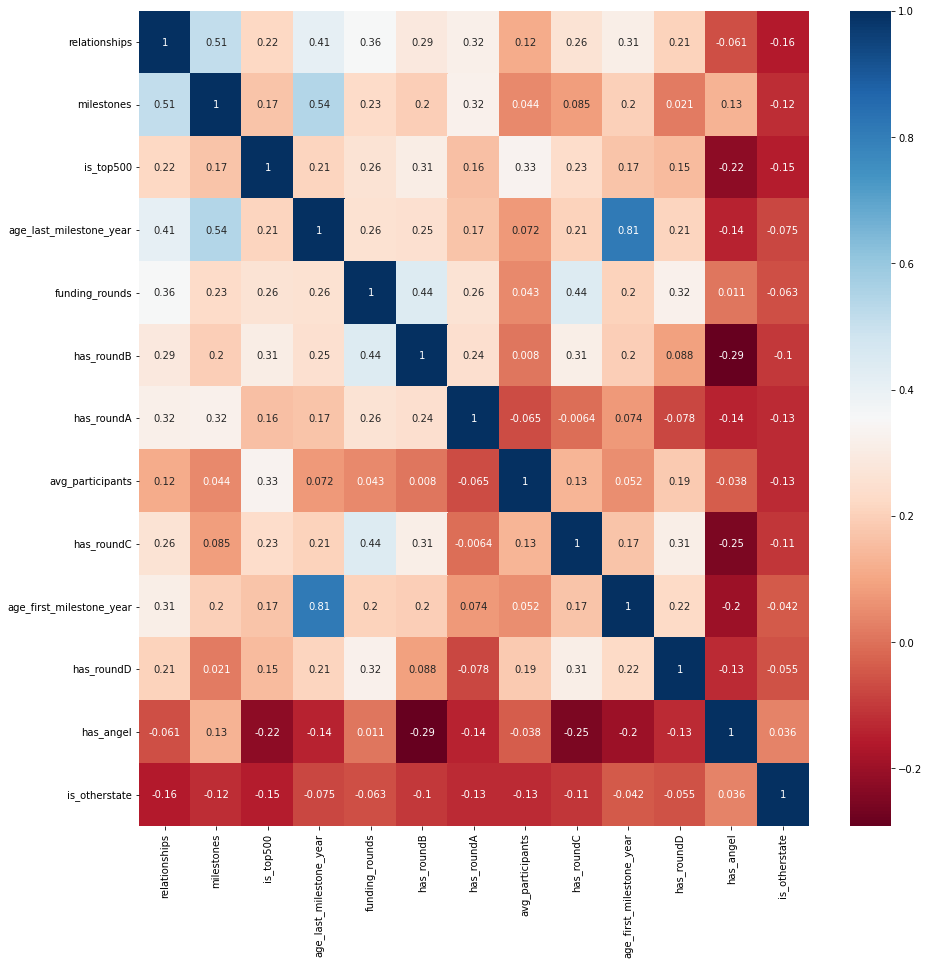

In [30]:
features = ['relationships','milestones','is_top500','age_last_milestone_year','funding_rounds','has_roundB','has_roundA','avg_participants','has_roundC','age_first_milestone_year','has_roundD', 'has_angel', 'is_otherstate']

plt.figure(figsize = (15,15))
sns.heatmap(df[features].corr(), annot = True, cmap = plt.cm.RdBu)
plt.show()


In [31]:
q1 = ''' 
        select rel_group, 
               status, 
               count(*) as cnt 
        from (
        select relationships,
               case when relationships = 0 then "0"
               when relationships between 1 and 3 then "1-3" 
               when relationships between 4 and 6 then "4-6"
               when relationships between 7 and 10 then "7-10" 
               else "10+" end as rel_group,
               status
        from df
        ) dt1
        group by 1,2
        order by 1

'''

rel_df = ps.sqldf(q1, locals())
rel_df

,rel_group,status,cnt
0,0,acquired,3
1,0,closed,34
2,1-3,acquired,89
3,1-3,closed,153
4,10+,acquired,193
5,10+,closed,22
6,4-6,acquired,181
7,4-6,closed,78
8,7-10,acquired,131
9,7-10,closed,39


In [32]:
label = np.concatenate([rel_df['rel_group'].unique(), rel_df['status'].unique()])
color = ["rgba(31, 119, 180, 0.8)", "rgba(255, 127, 14, 0.8)", "rgba(148, 103, 189, 0.8)", "rgba(140, 86, 75, 0.8)",
         "rgba(227, 119, 194, 0.8)", "rgba(44, 160, 44, 0.8)", "rgba(214, 39, 40, 0.8)"]

source = []
target = []
value = []

for i in range(len(label[:5])):
    for j in range(5, len(label)):
        source.append(i)
        if label[j] == 'acquired':
            target.append(5)
        else:
            target.append(6)
        value.append(rel_df[(rel_df['rel_group']==label[i]) & (rel_df['status'] == label[j])]['cnt'].values[0])

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      label = label,
      color = color
    ),
    link = dict(
        source = source,
        target = target,
        value = value
  ))

layout =  dict(
    title = "Link between number of relationships and company success/failure",
    font = dict(
      size = 10
    )
)
chmap = go.Figure(data = [data], layout = layout)
py.offline.iplot(chmap)

Scatter plot

based on the correlation table above which says that 'views' and 'likes' are very positively correlated. then we then verify that by plotting a scatter plot between 'views' and 'likes' to visualize the relationship between those variables.

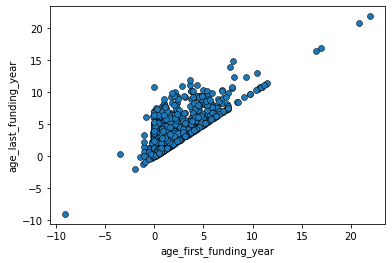

In [33]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_funding_year'], y=df['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

We see that **'age_first_milestones_year'** and **'age_last_milestones_year'** are really positively correlated whereas when one increases, the other also increases—mostly.

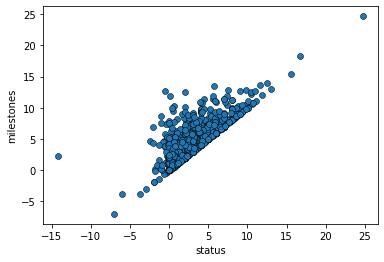

In [34]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_milestone_year'], y=df['age_last_milestone_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="milestones")

Box plots

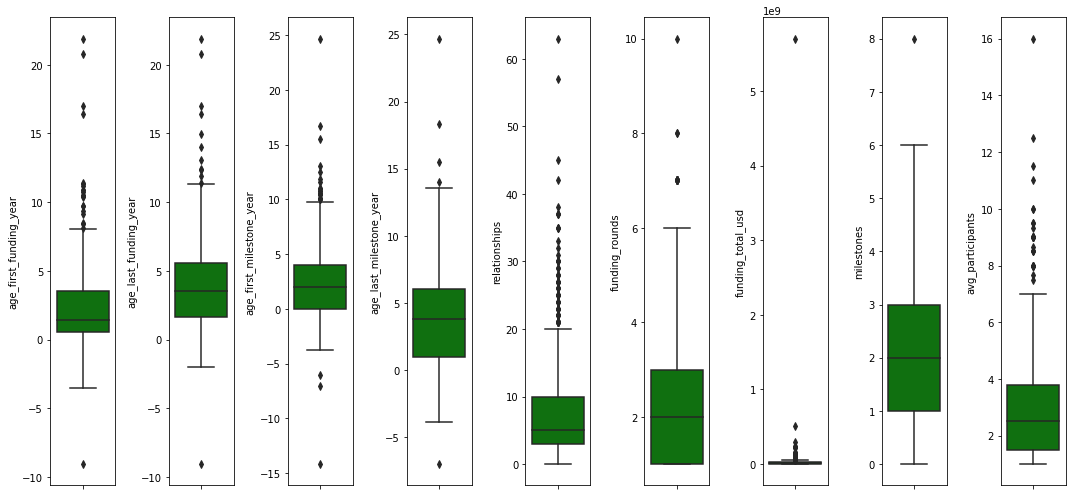

In [35]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

#Correlation between numeric parameters

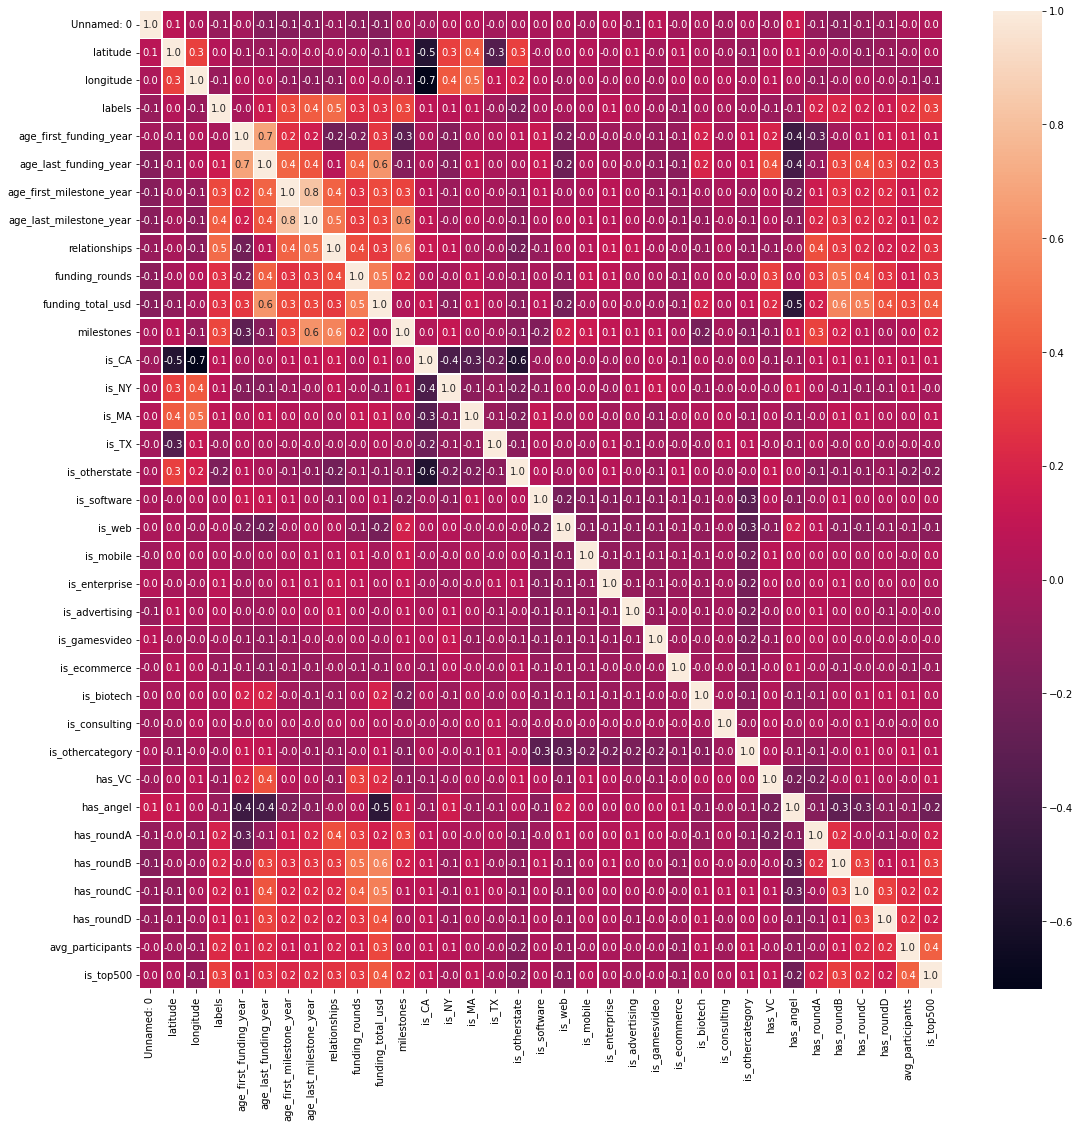

In [36]:
def draw_heatmap(dataset):
    
    
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = dataset.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical_df_1=df.select_dtypes(numerics)
numerical_column_names = df.select_dtypes(numerics).columns

draw_heatmap(numerical_df_1)

Add new feature 'Age'.

In [37]:
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['founded_at'] = pd.to_datetime(df['founded_at'])
#convert to datetime data

df['last_date']=df['closed_at'] #copy data
df['last_date']=df['last_date'].fillna('2013-12-31')
df['last_date']=pd.to_datetime(df['last_date'])

We fill column last_date with 2013-12-31 with assumption that is the last number of dataset.

In [38]:
df["founded_at"] = pd.to_datetime(df["founded_at"])
df["age"] = (df["last_date"]-df["founded_at"])
df["age"]=round(df.age/np.timedelta64(1,'Y'))

If we check it, there is minus number in here. Drop minus number.

In [39]:
df[[ 'age', 'age_first_funding_year','age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year']].sort_values('age').head()

,age,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year
88,-8.0,0.8822,0.8822,0.0000,0.0000
558,-4.0,-9.0466,-9.0466,-6.0466,-3.8822
73,-2.0,1.6685,9.3370,7.3808,10.4740
350,0.0,0.3288,0.3288,-0.4192,-0.4192
690,0.0,0.0000,0.6904,0.0000,0.6904


In [40]:
df.age.values

array([ 7., 14.,  5., 12.,  2.,  7.,  9., 10., 12.,  9., 13.,  6.,  8.,
        6., 13., 11., 10., 14.,  4.,  5., 13.,  8.,  7.,  6.,  3., 12.,
       11.,  6.,  7.,  9.,  6., 13.,  5.,  3.,  3.,  4.,  4.,  8.,  5.,
        8.,  8.,  2.,  3., 10., 12., 11.,  4.,  4.,  4., 11.,  8.,  5.,
        9., 14.,  8.,  5.,  8.,  9.,  7., 14., 12.,  7., 13., 12.,  5.,
        8., 12.,  8., 14.,  8.,  6.,  2.,  8., -2.,  2.,  5., 13.,  4.,
        8.,  5.,  3.,  5.,  6., 12.,  9.,  9.,  8., 12., -8., 11., 12.,
        5.,  7.,  3.,  8.,  9.,  8.,  5.,  6.,  6., 24., 14.,  9., 10.,
        4.,  6., 14.,  2.,  7.,  6.,  7., 11., 10.,  8.,  3.,  4., 16.,
       11.,  9.,  4.,  2.,  8.,  4.,  4.,  6.,  8., 14.,  4.,  5., 10.,
       14.,  2.,  7., 14.,  2., 13.,  6., 10.,  7.,  9.,  7.,  9.,  5.,
        8.,  4.,  7.,  5., 12.,  4., 12.,  9.,  3.,  3.,  9., 12.,  4.,
        8.,  7.,  5.,  3., 12.,  4.,  7., 10.,  4.,  8.,  5.,  1.,  5.,
        6.,  7.,  5.,  3.,  9.,  8.,  2.,  3.,  3.,  4.,  5., 11

In [41]:
df=df.drop(df[df.age<0].index)
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [42]:
#printing number of rows and number of columns
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  838
Number of columns:  50


In [43]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,last_date,age
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,2007-01-01,2013-12-31,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,2013-12-31,7.0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,2000-01-01,2013-12-31,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,2013-12-31,14.0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,2009-03-18,2013-12-31,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,2013-12-31,5.0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,2002-01-01,2013-12-31,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,2013-12-31,12.0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,2012-10-01,2.0


Now we check for distribution, there is some features with skewness disribution more than 2. Handling it with normalization.

In [44]:
features = ['age_first_funding_year', 'relationships','funding_total_usd',
            'age_last_funding_year','age_first_milestone_year', 
            'age_last_milestone_year', 'funding_rounds', 
            'milestones','avg_participants', 'age']
df[features].skew(axis=0, skipna=True)>2

age_first_funding_year       True
relationships                True
funding_total_usd            True
age_last_funding_year       False
age_first_milestone_year    False
age_last_milestone_year     False
funding_rounds              False
milestones                  False
avg_participants            False
age                         False
dtype: bool

In [45]:
norm = ['age_first_funding_year', 'relationships', 'funding_total_usd']
df = df
for var in norm:
    df['norm_'+var]=MinMaxScaler().fit_transform(df[var].values.reshape(len(df),1))

In [46]:
#printing number of rows and number of columns
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  838
Number of columns:  53


# Data Visualization

In [47]:
data_grp_3=df[df['labels']==1].groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_3.columns=['age','total_succes']

data_grp_4=df.groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_4.columns=['age','total']

data_grp_3=data_grp_3.merge(data_grp_4,
                           on='age')
data_grp_3['succes_rate']=round((data_grp_3['total_succes']/data_grp_3['total'])*100,2)

data_grp_3

,age,total_succes,total,succes_rate
0,2.0,8,38,21.05
1,3.0,16,53,30.19
2,4.0,36,68,52.94
3,5.0,51,83,61.45
4,6.0,59,83,71.08
5,7.0,54,85,63.53
6,8.0,56,73,76.71
7,9.0,66,85,77.65
8,10.0,41,53,77.36
9,11.0,43,52,82.69


<function matplotlib.pyplot.tight_layout>

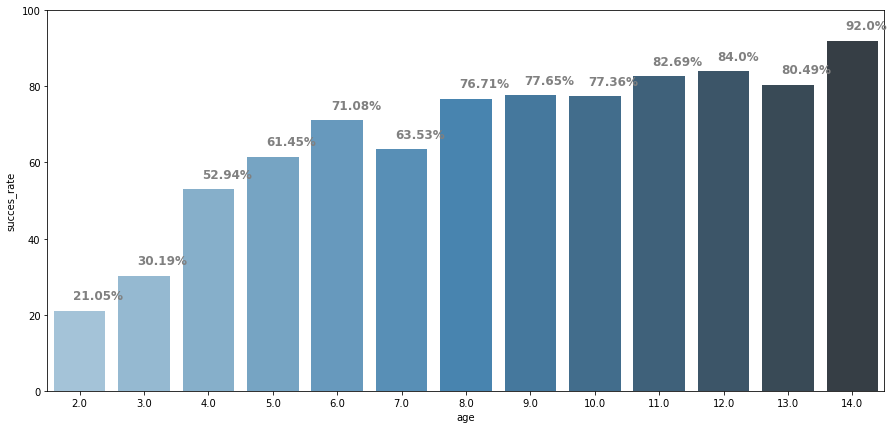

In [48]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'age',y='succes_rate',data=data_grp_3,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_3))
y = data_grp_3['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''

'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.tight_layout

1. Business insight from age : startups that have lifespan of more than 4 years have a tendency to be successful startup (more than 52%).

In [49]:
data_grp_5=df[df['labels']==1].groupby(['milestones']).agg({'labels':'count'}).reset_index()
data_grp_5.columns=['milestones','total_succes']

data_grp_6=df.groupby(['milestones']).agg({'labels':'count'}).reset_index()
data_grp_6.columns=['milestones','total']

data_grp_5=data_grp_5.merge(data_grp_6,
                           on='milestones')
data_grp_5['succes_rate']=round((data_grp_5['total_succes']/data_grp_5['total'])*100,2)

data_grp_5

,milestones,total_succes,total,succes_rate
0,0,46,143,32.17
1,1,140,230,60.87
2,2,161,218,73.85
3,3,135,164,82.32
4,4,43,54,79.63
5,5,22,24,91.67
6,6,3,4,75.00
7,8,1,1,100.00


<function matplotlib.pyplot.tight_layout>

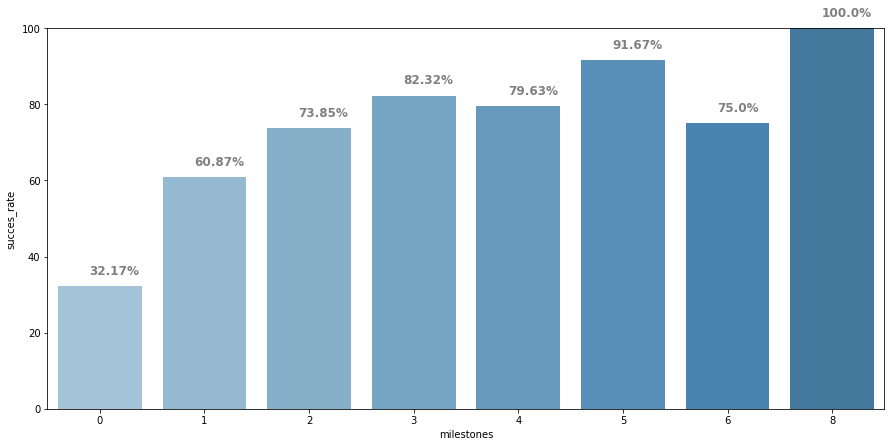

In [50]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'milestones',y='succes_rate',data=data_grp_5,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_5))
y = data_grp_5['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''

'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

2. Business insight from milestone : Startups that have min 1 milestone has potential to be successful startup (more than 60%).

How many Startup are acquired or closed have?

In [51]:
df_acquired = df[(df["labels"] == 1)]
df_acquired.shape

(551, 53)

In [52]:
df_closed = df[(df["labels"] == 0)]
df_closed.shape

(287, 53)

In [53]:
df.shape

(838, 53)

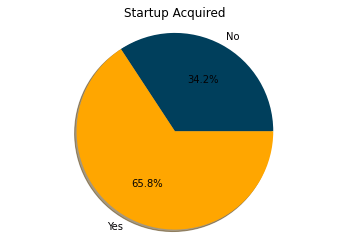

In [54]:
value_counts = df["labels"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], autopct='%1.1f%%',
           colors=['#003f5c', '#ffa600'], shadow=True, startangle=0, textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

Which category has the largest number of startup

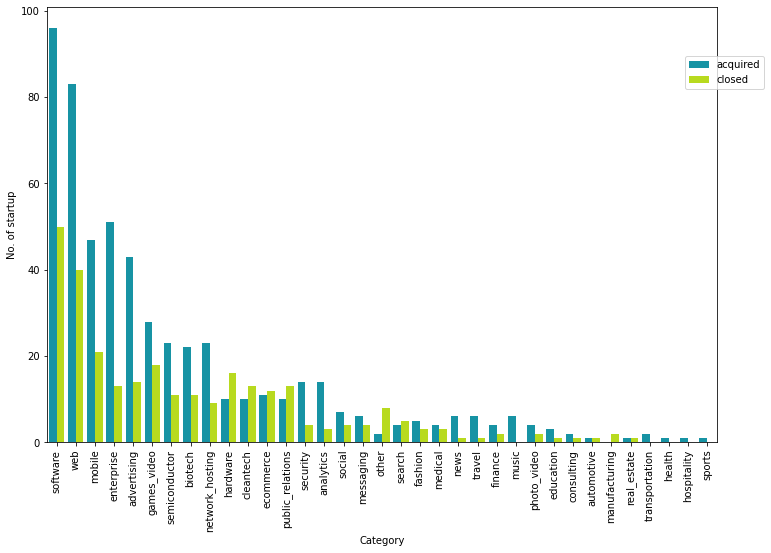

In [55]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=df, palette="nipy_spectral",
              order=df.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

Which category has the largest number Success Rate?

In [56]:
data1 = df[df['labels']==1].groupby(['category_code']).agg({'labels':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = df[df['labels']==0].groupby(['category_code']).agg({'labels':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=df.groupby(['category_code']).agg({'labels':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
27,travel,6,1,7,85.71
17,news,6,1,7,85.71
1,analytics,14,3,17,82.35
8,enterprise,51,13,64,79.69
23,security,14,4,18,77.78
0,advertising,43,14,57,75.44
7,education,3,1,4,75.00
16,network_hosting,23,9,32,71.88
15,mobile,47,21,68,69.12
24,semiconductor,23,11,34,67.65


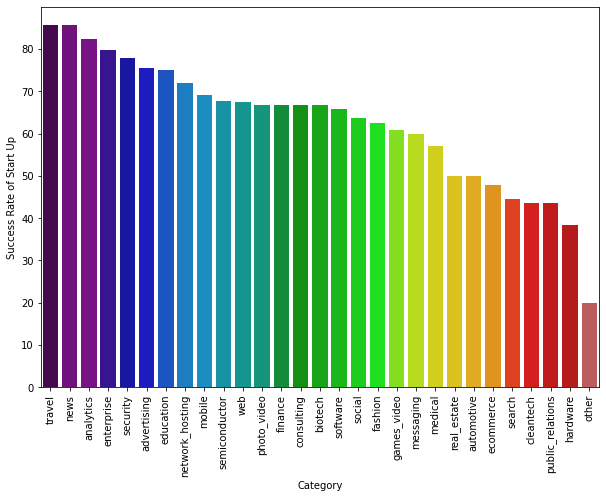

In [57]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

Which category having most number of total funding

In [58]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7176623599
30,software,2584384065
3,biotech,1704689813
34,web,1595787702
8,enterprise,1307185096
4,cleantech,1300284730
28,semiconductor,1095156970
0,advertising,831144012
11,games_video,784548530
12,hardware,753718873


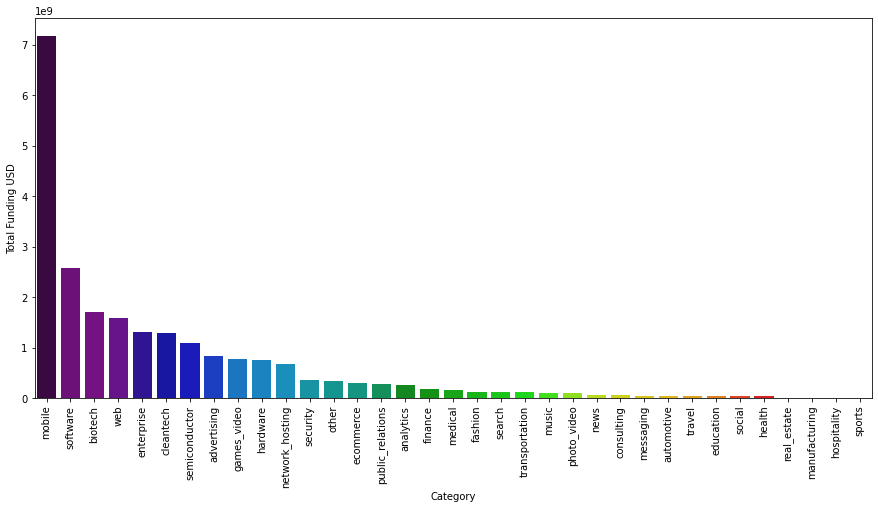

In [59]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")

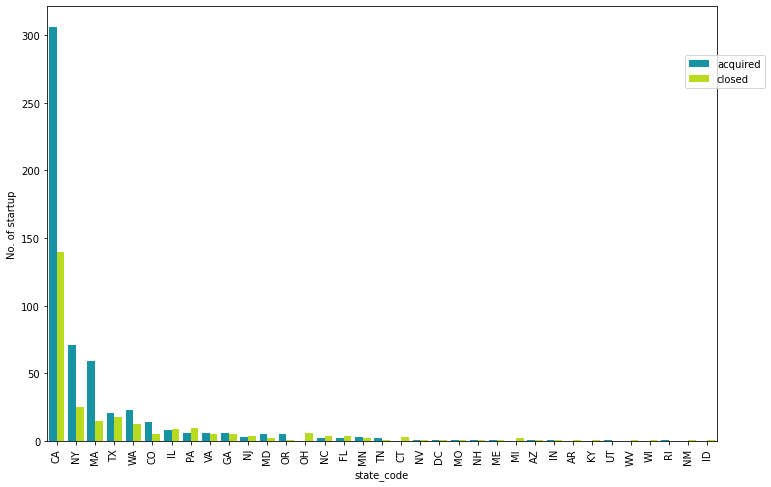

In [60]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [61]:
trending_statea = df.groupby(['state_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea

,state_code,num_startup
2,CA,446
23,NY,96
12,MA,74
29,TX,39
32,WA,36
3,CO,19
9,IL,17
26,PA,16
31,VA,11
7,GA,11


Which State having most number of acquired Startup per category

In [62]:
trending_statea = df_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea.head(10)

,state_code,category_code,num_startup
26,CA,software,50
67,MA,software,15
105,NY,web,12
135,WA,mobile,5
49,IL,software,4
128,TX,web,4
121,TX,enterprise,4
36,CO,software,4
131,VA,software,2
130,VA,mobile,2


Which State having most number of closed Startup per category

In [63]:
trending_statec = df_closed.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statec = trending_statec[trending_statec.groupby('state_code')['num_startup'].transform(max) == trending_statec['num_startup']]
most_trending_statec = most_trending_statec.sort_values('num_startup', ascending=False)
most_trending_statec

,state_code,category_code,num_startup
27,CA,web,21
59,MA,software,8
90,NY,web,6
116,TX,software,5
51,IL,web,3
129,WA,software,3
92,OH,ecommerce,2
43,GA,software,2
39,FL,software,2
76,NJ,software,2


Which city having most number of acquired Startup per category

In [64]:
trending_categorya = df_acquired.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categorya = trending_categorya[trending_categorya.groupby('city')['num_startup'].transform(max) == trending_categorya['num_startup']]
most_trending_categorya = most_trending_categorya.sort_values('num_startup', ascending=False)
most_trending_categorya

,city,category_code,num_startup
260,San Francisco,web,22
184,New York,web,12
274,San Mateo,software,8
315,Sunnyvale,software,8
159,Mountain View,web,8
...,...,...,...
107,Irvine,semiconductor,1
108,Itasca,security,1
109,Jersey City,ecommerce,1
110,Kansas City,mobile,1


Which city having most number of closed Startup per category

In [65]:
trending_categoryc = df_closed.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categoryc = trending_categoryc[trending_categoryc.groupby('city')['num_startup'].transform(max) == trending_categoryc['num_startup']].reset_index()
most_trending_categoryc = most_trending_categoryc.sort_values('num_startup', ascending=False)
most_trending_categoryc

,index,city,category_code,num_startup
124,183,San Jose,hardware,5
128,196,Santa Clara,software,5
93,127,New York,games_video,4
125,189,San Mateo,web,4
122,180,San Francisco,web,4
...,...,...,...,...
52,66,Freedom,software,1
53,67,Fremont,cleantech,1
54,68,Fremont,medical,1
55,69,Fremont,software,1


Which city having most number of total funding

In [66]:
funding_sorted_city = pd.pivot_table(df,
              index=['city'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_city.columns = ['city', 'funding_total_usd']
funding_sorted_city = funding_sorted_city.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_city = funding_sorted_city.head(10)
funding_sorted_city

,city,funding_total_usd
89,Kirkland,5718914576
166,San Francisco,1562469129
132,New York,1138449953
123,Mountain View,884903322
173,Santa Clara,829550274
168,San Jose,732227780
13,Austin,659317317
165,San Diego,609475001
157,Redwood City,521330100
108,Loveland,510000000


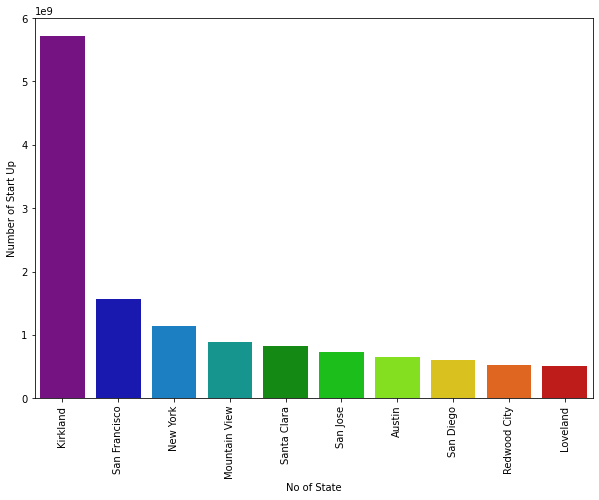

In [67]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="city", y="funding_total_usd", data=funding_sorted_city,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="No of State", ylabel="Number of Start Up")

How many Startup have has_VC?

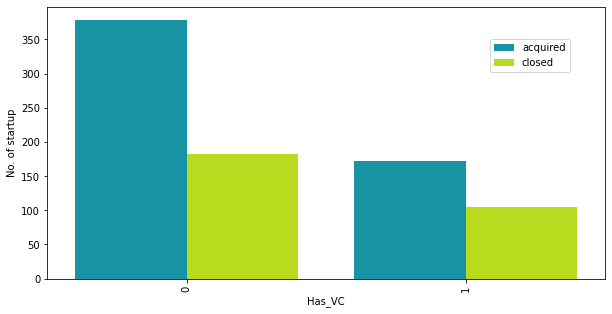

In [68]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="has_VC", hue="status", data=df, palette="nipy_spectral",
              order=df.has_VC.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Has_VC", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

How many Startup have is_top500?

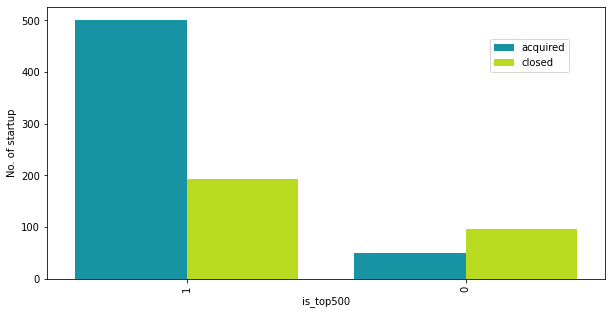

In [69]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="is_top500", hue="status", data=df, palette="nipy_spectral",
              order=df.is_top500.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [70]:
#How many Startup have both 'acquired' status and is_top500?
len(df[(df["labels"] == True) & (df["is_top500"] == True)].index)

501

In [71]:
#How many Startup have both 'closed' status and is_top500?
len(df[(df["labels"] == False) & (df["is_top500"] == False)].index)

95

In [72]:
df_acquired["is_top500"].value_counts(normalize=True)

1    0.909256
0    0.090744
Name: is_top500, dtype: float64

How many years on average the company closes

In [73]:
df_closed.founded_at=pd.to_datetime(df_closed.founded_at)
df_closed.closed_at=pd.to_datetime(df_closed.closed_at)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
df_closed['age_closed_startup'] = df_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
#df_closed['age_closed_startup'] = pd.to_numeric(df['age_closed_startup'].dt.days, downcast='int64')

In [76]:
df_closed['age_closed_startup'].head()

4     792 days
5    2602 days
12   3039 days
15   4104 days
16   3552 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [77]:
df_closed['year'] = df_closed['age_closed_startup'].dt.days /365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
df_closed.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,last_date,age,norm_age_first_funding_year,norm_relationships,norm_funding_total_usd,age_closed_startup,year
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0,1,closed,2012-10-01,2.0,0.000000,0.031746,0.000226,792 days,2.169863
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,2002-01-01,2009-02-15,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0,1,closed,2009-02-15,7.0,0.207582,0.047619,0.001314,2602 days,7.128767
12,531,KY,38.241467,-85.724511,40204,c:30290,Louisville,Louisville KY 40204,Resonant Vibes,0,2004-01-01,2012-04-27,11/25/2008,11/25/2008,4.9041,4.9041,0.0000,0.0000,0,1,350000,0,0,0,0,0,1,web,0,1,0,0,0,0,0,0,0,0,c:30290,1,0,0,0,0,0,1.0,0,closed,2012-04-27,8.0,0.223973,0.000000,0.000059,3039 days,8.326027


In [79]:
(df_closed['age_closed_startup'].mean()) 

Timedelta('2299 days 16:58:32.195121952')

In [80]:
ratarata = round(2184 / 365) 
print("Rata-Rata Startup Closed :", ratarata ,"tahun")

Rata-Rata Startup Closed : 6 tahun


which relationship related to acquired or closed startup?

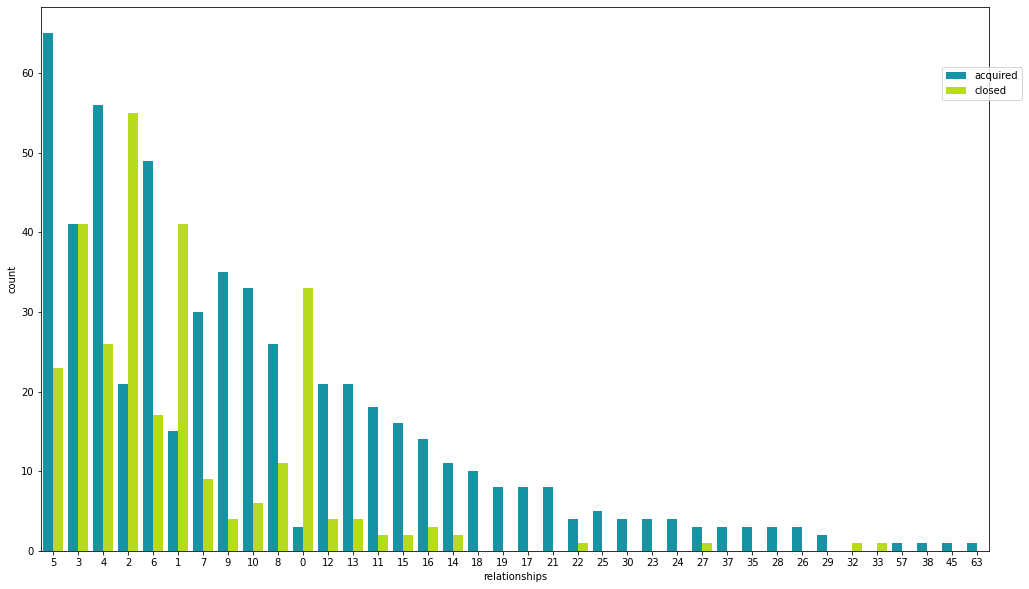

In [81]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))

which funding_rounds related to acquired or closed startup?

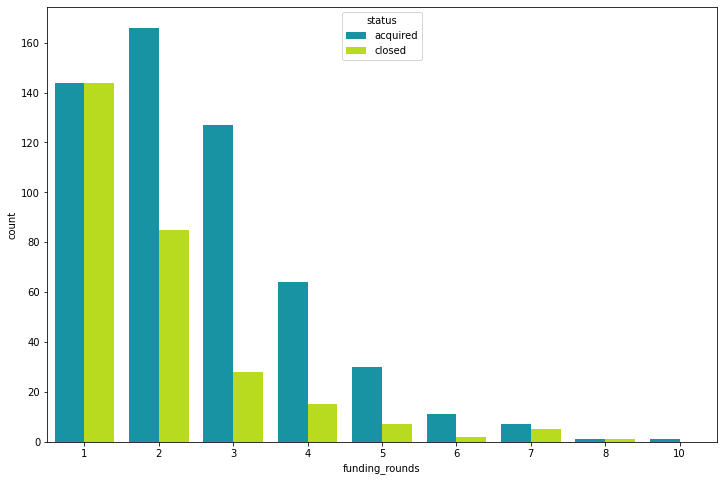

In [82]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral",
              order=df.funding_rounds.value_counts().index)
# plt.legend(bbox_to_anchor=(0.945, 0.90))

Investing Feature on Acquired

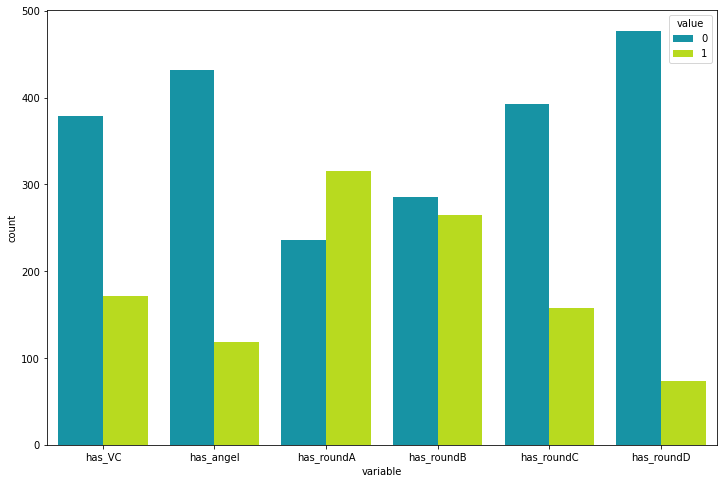

In [83]:
coba = df[(df["status"] == "acquired")]

features = coba[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]

fig, ax = plt.subplots(figsize=(12,8))

a= np.random.choice(["{}".format(i) for i in [1,2,3,4,5,6]], size=(12,8))
coba = pd.DataFrame(a, columns=["has_{}".format(i) for i in list("features")])

sns.countplot(x="variable", hue="value",palette="nipy_spectral", data=pd.melt(features))

plt.show()

In [84]:
df['Relationships Range'] = df['relationships'].apply(lambda x : 'relationship 0' if x==0 else 'relationships >10' if x>10 else 'relationships 1-10' )
data20 = df.groupby(['Relationships Range', 'labels']).agg({'id' : 'count'}).reset_index()
data20_pv = pd.pivot_table(data20,
                          index=['Relationships Range'],
                          columns=['labels'],
                          values=['id']).reset_index()
data20_pv.columns = ['Relationships Range', 'Closed', 'Acquired']
data20_pv['Total Company'] = data20_pv['Closed']+data20_pv['Acquired']
data20_pv['Success Rate'] = round(data20_pv['Acquired']/data20_pv['Total Company']*100,2)
data20_pv

,Relationships Range,Closed,Acquired,Total Company,Success Rate
0,relationship 0,33,3,36,8.33
1,relationships 1-10,233,371,604,61.42
2,relationships >10,21,177,198,89.39


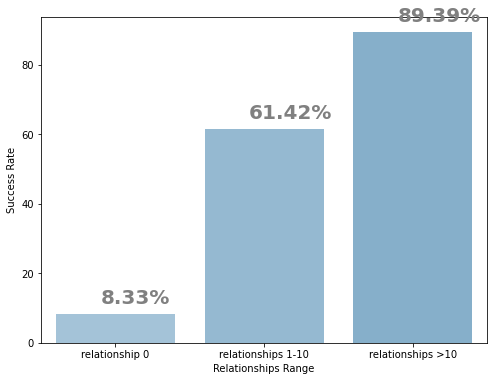

In [85]:
fig, ax = plt.subplots(figsize=(8,6))

g = sns.barplot(x = 'Relationships Range',y='Success Rate',data=data20_pv,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data20_pv['Relationships Range']))
y = data20_pv['Success Rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 20, color='gray', fontweight='bold')
  
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

3. Business insigt from relationship: startups with relationships more than 1 has potential to be successful startup (more than 61%)

Data Preprocessing

Duplicate Values

In [86]:
#check
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


Negative value

In [87]:
age1=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age1)):
    print("Is there any negative value in '{}' column  : {} ".format(age1[a],(df[age1[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


Outliers

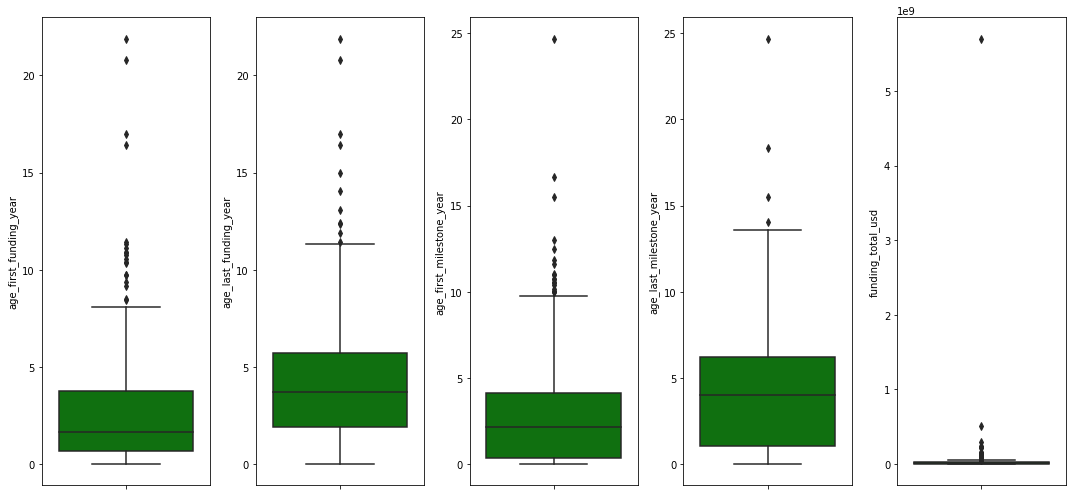

In [88]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

Log-transformation of the funding and milestone year variable

In [89]:
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

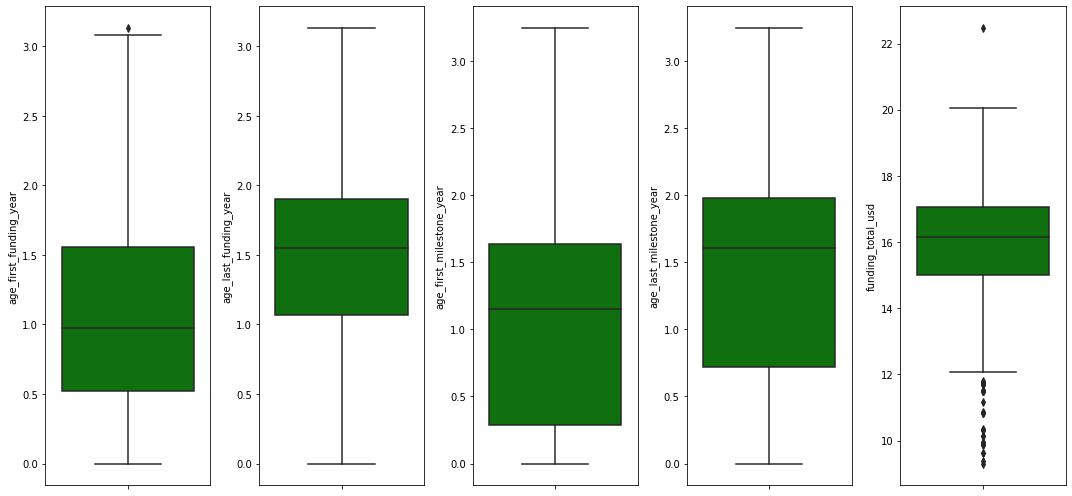

In [90]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

In [91]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,last_date,age,norm_age_first_funding_year,norm_relationships,norm_funding_total_usd,Relationships Range
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,2007-01-01,2013-12-31,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,2013-12-31,7.0,0.102727,0.047619,0.000064,relationships 1-10
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,2000-01-01,2013-12-31,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,2013-12-31,14.0,0.234108,0.142857,0.007033,relationships 1-10
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,2009-03-18,2013-12-31,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,2013-12-31,5.0,0.047173,0.079365,0.000454,relationships 1-10
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,2002-01-01,2013-12-31,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,2013-12-31,12.0,0.143018,0.079365,0.007016,relationships 1-10
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,2012-10-01,2.0,0.000000,0.031746,0.000226,relationships 1-10


# Modeling

In [93]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,last_date,age,norm_age_first_funding_year,norm_relationships,norm_funding_total_usd,Relationships Range
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,2007-01-01,2013-12-31,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,2013-12-31,7.0,0.102727,0.047619,0.000064,relationships 1-10
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,2000-01-01,2013-12-31,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,2013-12-31,14.0,0.234108,0.142857,0.007033,relationships 1-10
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,2009-03-18,2013-12-31,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,2013-12-31,5.0,0.047173,0.079365,0.000454,relationships 1-10
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,2002-01-01,2013-12-31,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,2013-12-31,12.0,0.143018,0.079365,0.007016,relationships 1-10
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,2012-10-01,2.0,0.000000,0.031746,0.000226,relationships 1-10


In [94]:
# Split Feature Vector and Label
X = df[['norm_relationships', 'norm_age_first_funding_year','norm_funding_total_usd',
          
          'age_last_funding_year',
          'age_first_milestone_year', 'age_last_milestone_year', 
          'funding_rounds', 'milestones','age',

          'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 
          'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 
          'is_ecommerce', 'is_biotech', 'is_consulting','is_othercategory', 
          'has_VC', 'has_angel', 'has_roundA','has_roundB', 'has_roundC', 'has_roundD', 
          'avg_participants','is_top500'
          ]]

y = df['labels'] # target / label

#Splitting the data into Train and Test
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)



In [95]:
# Oversampling
X_train, y_train = over_sampling.RandomOverSampler(random_state=42).fit_resample(X_train, y_train)

Feature Scalling:

In [96]:
X_train.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0.380952,0.000000,0.004720,2.014716,0.290428,2.398640,3,3,14.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,6.0,1
1,0.047619,0.030654,0.000016,0.513542,0.000000,0.563152,1,2,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0,0
2,0.031746,0.047297,0.000182,1.146736,0.948099,0.948099,2,1,4.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0
3,0.063492,0.473349,0.003682,2.430486,1.922554,1.922554,1,1,13.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,5.0,1
4,0.412698,0.248375,0.006314,2.004071,1.946696,1.946696,2,1,14.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3.5,1


In [97]:
# We need to scale correctly (We will use MinMax Scaler to do this)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'funding_rounds', 'milestones', 'age', 'avg_participants']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [98]:
X_train.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0.380952,0.000000,0.004720,0.643482,0.089475,0.738975,0.222222,0.375,0.500000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.333333,1
1,0.047619,0.030654,0.000016,0.164021,0.000000,0.173496,0.000000,0.250,0.071429,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.000000,0
2,0.031746,0.047297,0.000182,0.366257,0.292091,0.292091,0.111111,0.125,0.142857,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,0
3,0.063492,0.473349,0.003682,0.776275,0.592302,0.592302,0.000000,0.125,0.464286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.266667,1
4,0.412698,0.248375,0.006314,0.640082,0.599739,0.599739,0.111111,0.125,0.500000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.166667,1


In [99]:
X_test.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
226,0.015873,0.193570,0.008770,0.528917,0.000000,0.000000,0.000000,0.000,0.392857,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.333333,1
909,0.412698,0.038039,0.009647,0.509990,0.462156,0.665265,0.333333,0.625,0.321429,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.116667,1
87,0.031746,0.360236,0.007489,0.784636,0.106661,0.106661,0.222222,0.125,0.428571,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0.177780,1
74,0.015873,0.082458,0.000524,0.329478,0.000000,0.000000,0.000000,0.000,0.071429,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,1
745,0.190476,0.080453,0.000617,0.383835,0.193941,0.429194,0.111111,0.375,0.178571,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.000000,0


Feature Selection

We will cross check if our features has any redundancy or will cause some problem in training and testing period.

In [100]:
df.dtypes

Unnamed: 0                              int64
state_code                             object
latitude                              float64
longitude                             float64
zip_code                               object
id                                     object
city                                   object
Unnamed: 6                             object
name                                   object
labels                                  int64
founded_at                     datetime64[ns]
closed_at                      datetime64[ns]
first_funding_at                       object
last_funding_at                        object
age_first_funding_year                float64
age_last_funding_year                 float64
age_first_milestone_year              float64
age_last_milestone_year               float64
relationships                           int64
funding_rounds                          int64
funding_total_usd                     float64
milestones                        

**Algorithm 1 - Dropping Constant Features using Variance Threshold Technique:**

In [101]:
from sklearn.feature_selection import VarianceThreshold
# By default, the threshold = 0 i.e. it will remove the zero-variance threshold
var_thresh = VarianceThreshold() # by default the threshold = 0
var_thresh.fit(X)

VarianceThreshold()

In [102]:
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [103]:
print("All features: ", X.columns)
print("Features Selected: ", X.columns[var_thresh.get_support()])

All features:  Index(['norm_relationships', 'norm_age_first_funding_year',
       'norm_funding_total_usd', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'funding_rounds',
       'milestones', 'age', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500'],
      dtype='object')
Features Selected:  Index(['norm_relationships', 'norm_age_first_funding_year',
       'norm_funding_total_usd', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'funding_rounds',
       'milestones', 'age', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_adverti

In [104]:
# the following code drops the columns based on the variance threshold algorithm
selected_columns = X.columns[var_thresh.get_support()]
for cols in X.columns:
    if cols not in selected_columns:
        data.drop(columns = cols, inplace = True)

In [105]:
X.shape

(838, 32)

In [106]:
X_train.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0.380952,0.000000,0.004720,0.643482,0.089475,0.738975,0.222222,0.375,0.500000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.333333,1
1,0.047619,0.030654,0.000016,0.164021,0.000000,0.173496,0.000000,0.250,0.071429,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.000000,0
2,0.031746,0.047297,0.000182,0.366257,0.292091,0.292091,0.111111,0.125,0.142857,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,0
3,0.063492,0.473349,0.003682,0.776275,0.592302,0.592302,0.000000,0.125,0.464286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.266667,1
4,0.412698,0.248375,0.006314,0.640082,0.599739,0.599739,0.111111,0.125,0.500000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.166667,1


**Algorithm 2 - Feature Selection with Pearson's correlation:**

In [107]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
norm_relationships,1.000000,-0.141423,0.100366,0.131354,0.374264,0.426381,0.333879,0.506999,0.093915,0.099911,0.047915,-0.011688,0.032354,-0.162604,-0.019774,0.020592,0.066452,0.142199,0.042601,0.019095,-0.054097,-0.055593,0.056146,-0.105962,-0.042569,-0.060083,0.283697,0.259449,0.232946,0.176347,0.069995,0.225228
norm_age_first_funding_year,-0.141423,1.000000,0.044203,0.688618,0.339332,0.185623,-0.117862,-0.247985,0.743813,0.030262,-0.127767,0.006038,-0.013947,0.062222,0.036798,-0.123162,-0.064241,-0.066060,-0.083843,-0.097289,-0.089344,0.195289,0.021775,0.174662,0.161835,-0.339580,-0.218439,-0.064771,0.036484,0.151033,0.087159,0.062753
norm_funding_total_usd,0.100366,0.044203,1.000000,0.107274,0.072107,0.073713,0.120616,0.013568,0.062987,-0.027917,-0.023444,-0.008595,-0.004641,0.058023,-0.018083,-0.027236,0.128897,-0.011612,-0.015340,-0.015779,-0.016802,0.033200,-0.003607,-0.019809,0.003537,-0.059364,-0.027747,0.020610,0.042484,0.042420,0.055168,0.051993
age_last_funding_year,0.131354,0.688618,0.107274,1.000000,0.468239,0.365527,0.432511,-0.056888,0.780666,0.093148,-0.141983,0.083191,-0.054363,-0.028696,0.088909,-0.164017,0.021224,0.010090,-0.075280,-0.135145,-0.155279,0.215463,0.012199,0.107225,0.358360,-0.442363,0.011154,0.322323,0.373939,0.306516,0.154013,0.334280
age_first_milestone_year,0.374264,0.339332,0.072107,0.468239,1.000000,0.881322,0.230384,0.392880,0.463200,0.124372,-0.076355,0.055941,-0.020558,-0.114482,0.100386,0.010018,0.039952,0.072206,-0.031508,-0.062946,-0.088075,0.009550,0.004286,-0.070966,0.059487,-0.204813,0.136911,0.200949,0.179131,0.218021,0.051720,0.243379
age_last_milestone_year,0.426381,0.185623,0.073713,0.365527,0.881322,1.000000,0.257941,0.670245,0.353374,0.148358,-0.006823,0.052138,-0.019822,-0.192024,0.045518,0.066010,0.094357,0.067900,-0.031509,-0.013130,-0.084000,-0.051971,-0.007290,-0.095400,0.028599,-0.089462,0.208284,0.204062,0.167749,0.186952,0.092542,0.286463
funding_rounds,0.333879,-0.117862,0.120616,0.432511,0.230384,0.257941,1.000000,0.222356,0.176209,0.047584,0.002022,0.051930,-0.053391,-0.062157,0.033399,-0.090266,0.113782,0.107129,-0.005132,-0.027627,-0.089982,0.083073,-0.031104,-0.063454,0.319328,-0.006701,0.248373,0.449183,0.457834,0.304204,0.081453,0.289789
milestones,0.506999,-0.247985,0.013568,-0.056888,0.392880,0.670245,0.222356,1.000000,-0.112143,0.035033,0.122382,0.060074,0.013581,-0.176604,-0.078075,0.129952,0.145382,0.094407,0.023413,0.115348,0.024255,-0.175366,-0.018937,-0.168386,-0.091508,0.153940,0.299537,0.153933,0.070184,0.030981,0.032438,0.193767
age,0.093915,0.743813,0.062987,0.780666,0.463200,0.353374,0.176209,-0.112143,1.000000,0.092006,-0.156863,0.083389,-0.062652,-0.012132,0.118055,-0.102465,-0.011209,-0.063379,-0.041210,-0.139720,-0.179271,0.136711,0.014437,0.124565,0.168555,-0.389086,-0.053763,0.215975,0.298613,0.295810,0.163763,0.225151
is_CA,0.099911,0.030262,-0.027917,0.093148,0.124372,0.148358,0.047584,0.035033,0.092006,1.000000,-0.369240,-0.304406,-0.247207,-0.582251,-0.091567,0.052241,0.021696,0.000913,0.007746,-0.017754,-0.093546,-0.010362,0.033773,0.064947,-0.014743,-0.117490,0.093442,0.146240,0.073244,0.079914,0.045636,0.150971


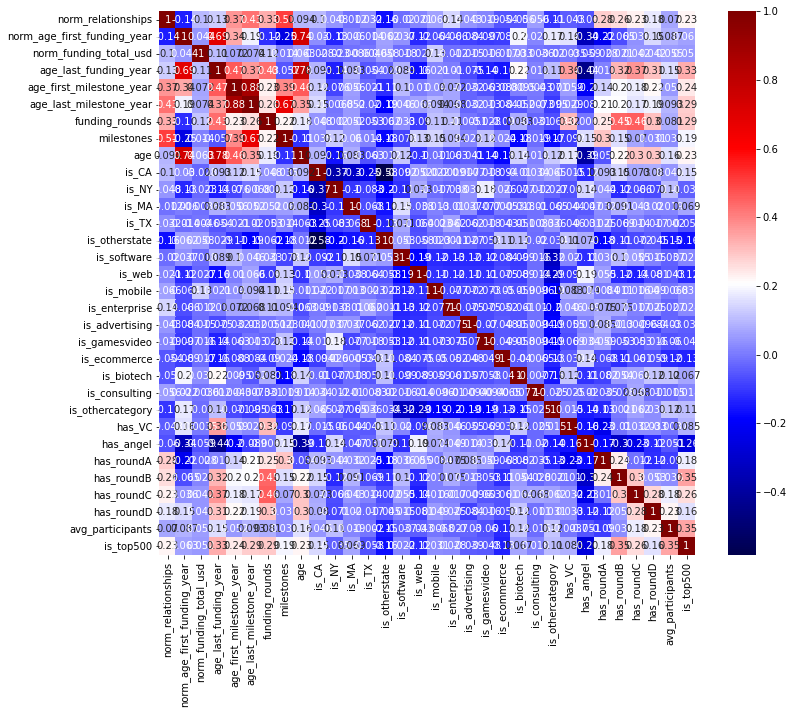

In [108]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

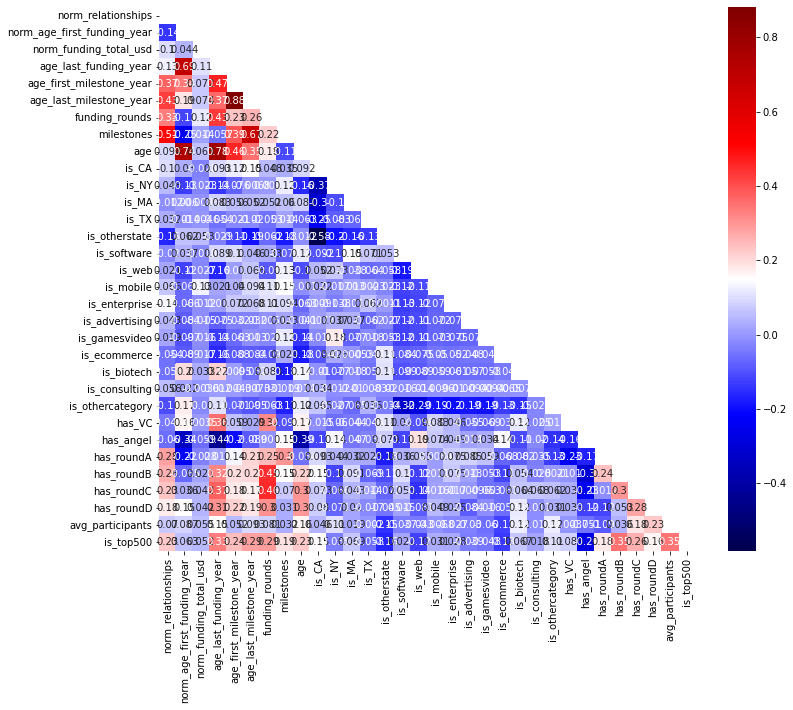

In [109]:
# use of the mask 
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [110]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [111]:
corr_features = correlation(X_train, 0.9) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


**Algorithm 3 - Feature Selection using Information Gain:**

In [112]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info

array([0.10741408, 0.13092937, 0.14644023, 0.18334162, 0.15173332,
       0.20035467, 0.04779537, 0.04728455, 0.14112813, 0.03280439,
       0.01031992, 0.        , 0.        , 0.        , 0.01890481,
       0.01157547, 0.        , 0.02348066, 0.        , 0.0120012 ,
       0.        , 0.01020274, 0.04805602, 0.        , 0.        ,
       0.        , 0.0041705 , 0.02300292, 0.03834311, 0.01718624,
       0.06390142, 0.03346623])

In [113]:
print(len(mutual_info))
print(X_train.shape)

32
(798, 32)


In [114]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

age_last_milestone_year        0.200355
age_last_funding_year          0.183342
age_first_milestone_year       0.151733
norm_funding_total_usd         0.146440
age                            0.141128
norm_age_first_funding_year    0.130929
norm_relationships             0.107414
avg_participants               0.063901
is_consulting                  0.048056
funding_rounds                 0.047795
milestones                     0.047285
has_roundC                     0.038343
is_top500                      0.033466
is_CA                          0.032804
is_enterprise                  0.023481
has_roundB                     0.023003
is_software                    0.018905
has_roundD                     0.017186
is_gamesvideo                  0.012001
is_web                         0.011575
is_NY                          0.010320
is_biotech                     0.010203
has_roundA                     0.004170
is_MA                          0.000000
is_TX                          0.000000


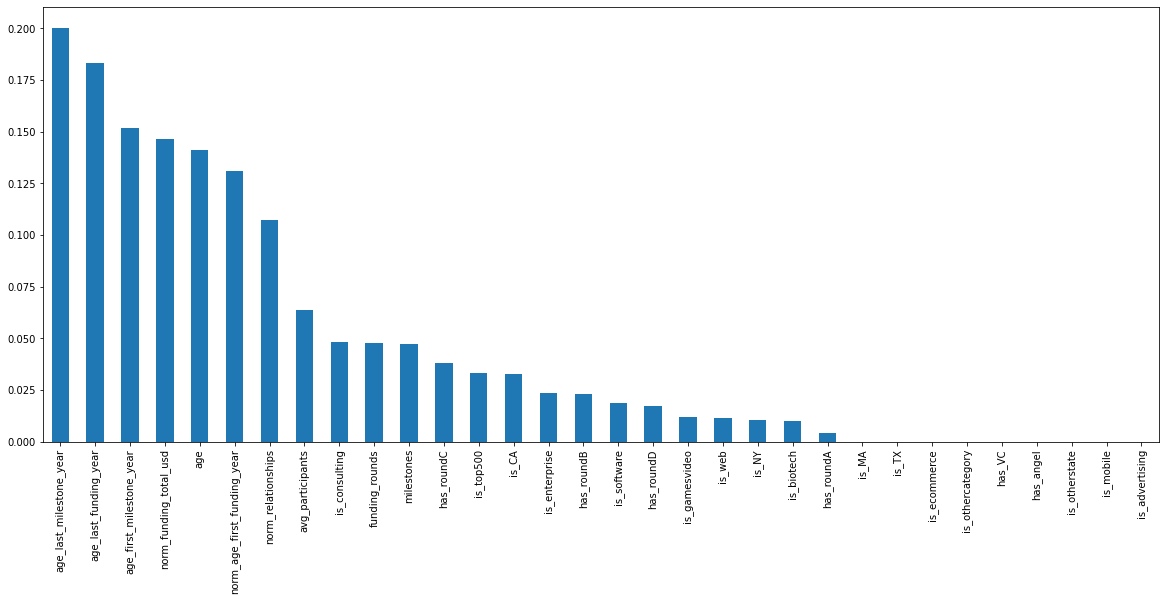

In [115]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [117]:
X.dtypes

norm_relationships             float64
norm_age_first_funding_year    float64
norm_funding_total_usd         float64
age_last_funding_year          float64
age_first_milestone_year       float64
age_last_milestone_year        float64
funding_rounds                   int64
milestones                       int64
age                            float64
is_CA                            int64
is_NY                            int64
is_MA                            int64
is_TX                            int64
is_otherstate                    int64
is_software                      int64
is_web                           int64
is_mobile                        int64
is_enterprise                    int64
is_advertising                   int64
is_gamesvideo                    int64
is_ecommerce                     int64
is_biotech                       int64
is_consulting                    int64
is_othercategory                 int64
has_VC                           int64
has_angel                

In [118]:
X.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0.047619,0.102727,0.000064,1.386969,1.734925,2.041753,3,3,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,0.142857,0.234108,0.007033,2.397650,2.080129,2.080129,4,1,14.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,0.079365,0.047173,0.000454,0.709463,0.899145,1.164868,1,2,5.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,0.079365,0.143018,0.007016,1.842944,1.946296,1.946296,3,1,12.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,0.031746,0.000000,0.000226,0.981517,0.037681,0.037681,2,1,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1


Modelling with Classifiers

Modeling with AdaBoost

In [119]:
from lightgbm import LGBMClassifier

Training Accuracy : 1.0
Testing Accuracy : 0.8571428571428571


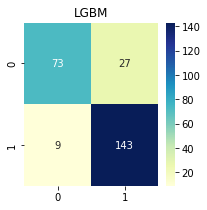

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       100
           1       0.84      0.94      0.89       152

    accuracy                           0.86       252
   macro avg       0.87      0.84      0.85       252
weighted avg       0.86      0.86      0.85       252

------------------------------------------
ROC Curves              = 0.8353947368421053
Precision-Recall Curves = 0.9088401149933658


In [120]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()

clf.fit(X_train,y_train)

y_pred_lgb = clf.predict(X_test)

print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('LGBM')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
Precision_Recall_lgbm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_lgbm)

Training Accuracy : 1.0
Testing Accuracy : 0.8492063492063492


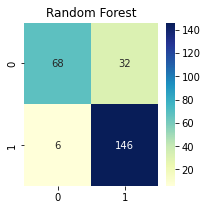

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       100
           1       0.82      0.96      0.88       152

    accuracy                           0.85       252
   macro avg       0.87      0.82      0.83       252
weighted avg       0.86      0.85      0.84       252

------------------------------------------
ROC Curves              = 0.8202631578947367
Precision-Recall Curves = 0.9022802793500605


In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('Random Forest')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

Training Accuracy : 0.768170426065163
Testing Accuracy : 0.8373015873015873


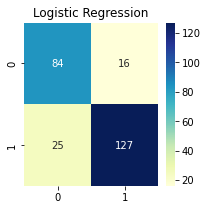

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.89      0.84      0.86       152

    accuracy                           0.84       252
   macro avg       0.83      0.84      0.83       252
weighted avg       0.84      0.84      0.84       252

------------------------------------------
ROC Curves              = 0.8377631578947369
Precision-Recall Curves = 0.9114222765538554


In [122]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0).fit(X_train, y_train)

LR.score(X_train, y_train)

y_pred_LR = LR.predict(X_test)

print("Training Accuracy :", LR.score(X_train, y_train))
print("Testing Accuracy :", LR.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_LR)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('Logistic Regression')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_LR)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_LR)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)
Precision_Recall_LRS = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_LRS)

Training Accuracy : 0.8508771929824561
Testing Accuracy : 0.7619047619047619


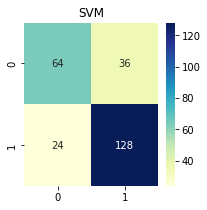

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       100
           1       0.78      0.84      0.81       152

    accuracy                           0.76       252
   macro avg       0.75      0.74      0.75       252
weighted avg       0.76      0.76      0.76       252

roc_auc 0.7410526315789473
------------------------------------------
ROC Curves              = 0.7410526315789473
Precision-Recall Curves = 0.8589155816370193


In [123]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_predicted_svm = svm.predict(X_test)

print("Training Accuracy :", svm.score(X_train, y_train))
print("Testing Accuracy :", svm.score(X_test, y_test))


cm = confusion_matrix(y_test, y_predicted_svm)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('SVM')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_svm)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_svm)
f1 = f1_score(y_test, y_predicted_svm)
Precision_Recall_svm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_svm)

XGBoost Classifier:

Training Accuracy : 0.9486215538847118
Testing Accuracy : 0.8492063492063492


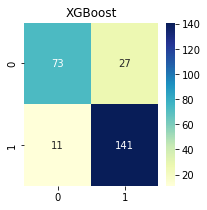

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       100
           1       0.84      0.93      0.88       152

    accuracy                           0.85       252
   macro avg       0.85      0.83      0.84       252
weighted avg       0.85      0.85      0.85       252

------------------------------------------
ROC Curves              = 0.8288157894736843
Precision-Recall Curves = 0.9052840434419382


In [124]:
from xgboost import XGBClassifier

#train
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

#predict
y_predicted_xgb = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('XGBoost')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)

print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb)
f1 = f1_score(y_test, y_predicted_xgb)
Precision_Recall_xgb = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_xgb)

GradientBoosting Classifier:

Training Accuracy : 1.0
Testing Accuracy : 0.8293650793650794


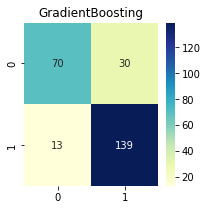

              precision    recall  f1-score   support

           0       0.84      0.70      0.77       100
           1       0.82      0.91      0.87       152

    accuracy                           0.83       252
   macro avg       0.83      0.81      0.82       252
weighted avg       0.83      0.83      0.83       252

------------------------------------------
ROC Curves              = 0.8072368421052631
Precision-Recall Curves = 0.8942730964492098


In [125]:
from sklearn.ensemble import GradientBoostingClassifier
#train
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(X_train,y_train)

#predict
y_predicted_gb = gbc.predict(X_test)

print("Training Accuracy :", gbc.score(X_train, y_train))
print("Testing Accuracy :", gbc.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title("GradientBoosting")
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)
f1 = f1_score(y_test, y_predicted_gb)
Precision_Recall_gbs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gbs)

AdaBoostClassifier:

Training Accuracy : 0.8771929824561403
Testing Accuracy : 0.8333333333333334


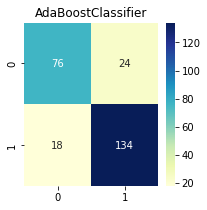

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       100
           1       0.85      0.88      0.86       152

    accuracy                           0.83       252
   macro avg       0.83      0.82      0.82       252
weighted avg       0.83      0.83      0.83       252

roc_auc 0.8207894736842105
------------------------------------------
ROC Curves              = 0.8207894736842105
Precision-Recall Curves = 0.9005543923098887


In [126]:
from sklearn.ensemble import AdaBoostClassifier
#train
ada = AdaBoostClassifier()


ada.fit(X_train,y_train)

#predict
y_predicted_ab = ada.predict(X_test)

print("Training Accuracy :", ada.score(X_train, y_train))
print("Testing Accuracy :", ada.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('AdaBoostClassifier')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_ab)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_abs)

In [127]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
scores = {'LGBM':  { 
                             'precision_score': precision_score(y_test, y_pred_lgb),
                             'Recall_score': recall_score(y_test, y_pred_lgb)
                         },        
                 
                        
                 'Random Forest':  { 
                             'precision_score': precision_score(y_test, y_pred_rf),
                            'Recall_score': recall_score(y_test, y_pred_rf)
                         },
                'Logistic Regression':  { 
                             'precision_score': precision_score(y_test, y_pred_LR),
                            'Recall_score': recall_score(y_test, y_pred_LR)
                         },
               'Support Vector Machine':  { 
                             'precision_score': precision_score(y_test, y_predicted_svm),
                            'Recall_score': recall_score(y_test, y_predicted_svm)
                         },
          'GradientBoosting Classifier':  { 
                             'precision_score': precision_score(y_test, y_predicted_gb),
                             'Recall_score': recall_score(y_test, y_predicted_gb)
                         },
          
          'XGBoost':  { 
                             'precision_score': precision_score(y_test, y_predicted_xgb),
                             'Recall_score': recall_score(y_test, y_predicted_xgb)
                         },
          'AdaBoostClassifier':   {
                                    'precision_score': precision_score(y_test, y_predicted_ab),
                                    'Recall_score': recall_score(y_test, y_predicted_ab)
              
          }
          
          
            }

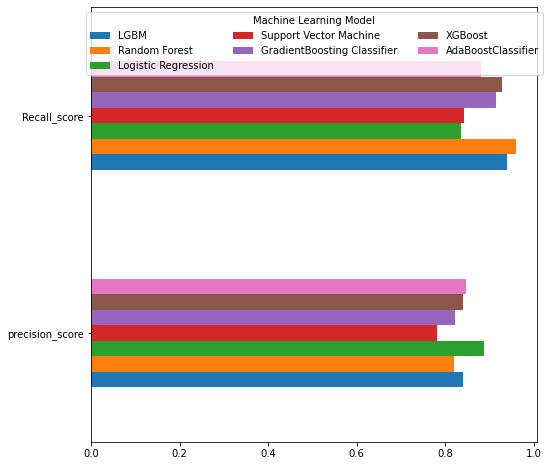

In [128]:
scores = pd.DataFrame(scores)


scores.plot(kind="barh",figsize=(8, 8)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

In [130]:
auc = {'LGBM':  { 
                            print( "LGBM Training Accuracy :", clf.score(X_train, y_train)),
                            print( "LGBM Testing Accuracy :", clf.score(X_test, y_test)),
                            print("\n")
                             
                         },        
                 
                        
                 'Random Forest':  { 
                            print("Random Forest Training Accuracy :",rf.score(X_train, y_train)),
                             print("Random Forest Testing Accuracy :", rf.score(X_test, y_test)),
                             print("\n")
                         },
                'Logistic Regression':  { 
                             print("Logistic Regression Training Accuracy :", LR.score(X_train, y_train)),
                             print("Logistic Regression Testing Accuracy :", LR.score(X_test, y_test)),
                             print("\n")
                         },
               'Support Vector Machine':  { 
                             print("Support Vector Machine Training Accuracy :", svm.score(X_train, y_train)),
                             print("Support Vector Machine Testing Accuracy :", svm.score(X_test, y_test)),
                             print("\n")
                         },
                 'GradientBoosting Classifier':  { 
                             print("GradientBoosting Classifier Training Accuracy :", gbc.score(X_train, y_train)),
                             print("GradientBoosting Classifier Testing Accuracy :", gbc.score(X_test, y_test)),
                             print("\n")
                         },
                  'XGBoost Classifier':  { 
                             print("XGBoost Classifier Training Accuracy :", xgb.score(X_train, y_train)),
                             print("XGBoost Classifier Testing Accuracy :", xgb.score(X_test, y_test)),
                             print("\n")
                         },
       
                  'AdaBoost Classifier':  { 
                             print("AdaBoost Classifier Training Accuracy :", ada.score(X_train, y_train)),
                             print("AdaBoost Classifier Testing Accuracy :", ada.score(X_test, y_test)),
                             print("\n")}
          
            }

LGBM Training Accuracy : 1.0
LGBM Testing Accuracy : 0.8571428571428571


Random Forest Training Accuracy : 1.0
Random Forest Testing Accuracy : 0.8492063492063492


Logistic Regression Training Accuracy : 0.768170426065163
Logistic Regression Testing Accuracy : 0.8373015873015873


Support Vector Machine Training Accuracy : 0.8508771929824561
Support Vector Machine Testing Accuracy : 0.7619047619047619


GradientBoosting Classifier Training Accuracy : 1.0
GradientBoosting Classifier Testing Accuracy : 0.8293650793650794


XGBoost Classifier Training Accuracy : 0.9486215538847118
XGBoost Classifier Testing Accuracy : 0.8492063492063492


AdaBoost Classifier Training Accuracy : 0.8771929824561403
AdaBoost Classifier Testing Accuracy : 0.8333333333333334




# StratifiedKfold Cross Validation Technique:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



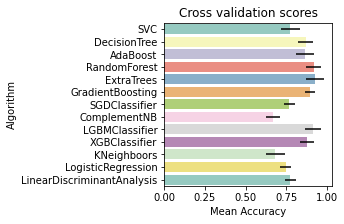

In [131]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(SGDClassifier(random_state=random_state))
classifiers.append(ComplementNB())
classifiers.append(LGBMClassifier())
classifiers.append(XGBClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","SGDClassifier","ComplementNB","LGBMClassifier","XGBClassifier","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

In [132]:
classifiers

[SVC(random_state=2),
 DecisionTreeClassifier(random_state=2),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2),
                    learning_rate=0.1, random_state=2),
 RandomForestClassifier(random_state=2),
 ExtraTreesClassifier(random_state=2),
 GradientBoostingClassifier(random_state=2),
 SGDClassifier(random_state=2),
 ComplementNB(),
 LGBMClassifier(),
 XGBClassifier(),
 KNeighborsClassifier(),
 LogisticRegression(random_state=2),
 LinearDiscriminantAnalysis()]

In [133]:
print(cv_res)

    CrossValMeans  CrossValerrors                   Algorithm
0        0.775854        0.059497                         SVC
1        0.871028        0.047268                DecisionTree
2        0.869858        0.055786                    AdaBoost
3        0.921203        0.047393                RandomForest
4        0.927437        0.056071                  ExtraTrees
5        0.897310        0.030347            GradientBoosting
6        0.770744        0.032717               SGDClassifier
7        0.667896        0.043905                ComplementNB
8        0.916171        0.047744              LGBMClassifier
9        0.878528        0.043867               XGBClassifier
10       0.684367        0.059744                 KNeighboors
11       0.746915        0.035818          LogisticRegression
12       0.777025        0.034354  LinearDiscriminantAnalysis


In [134]:
cv_means

[0.7758544303797468,
 0.8710284810126581,
 0.8698575949367088,
 0.9212025316455696,
 0.9274367088607594,
 0.8973101265822784,
 0.770743670886076,
 0.6678955696202531,
 0.9161708860759493,
 0.8785284810126581,
 0.684367088607595,
 0.7469145569620252,
 0.7770253164556962]

In [135]:
cv_results

[array([0.75      , 0.6875    , 0.7625    , 0.725     , 0.7625    ,
        0.725     , 0.825     , 0.8375    , 0.78481013, 0.89873418]),
 array([0.8125    , 0.775     , 0.9375    , 0.8375    , 0.875     ,
        0.875     , 0.8875    , 0.8875    , 0.92405063, 0.89873418]),
 array([0.8125    , 0.7625    , 0.925     , 0.8375    , 0.8625    ,
        0.85      , 0.8875    , 0.875     , 0.96202532, 0.92405063]),
 array([0.85      , 0.8625    , 0.8875    , 0.875     , 0.9125    ,
        0.95      , 0.9625    , 0.95      , 0.98734177, 0.97468354]),
 array([0.825     , 0.8875    , 0.9       , 0.875     , 0.8875    ,
        0.975     , 1.        , 0.975     , 0.97468354, 0.97468354]),
 array([0.8375    , 0.85      , 0.9125    , 0.875     , 0.9125    ,
        0.9125    , 0.925     , 0.9       , 0.92405063, 0.92405063]),
 array([0.7375    , 0.775     , 0.7625    , 0.775     , 0.775     ,
        0.775     , 0.8125    , 0.7       , 0.7721519 , 0.82278481]),
 array([0.65      , 0.7       , 0.

Hyper Perameters tuning:

In [136]:
best_classifiers=[]
# Adaboost

### META MODELING
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

# Best score
print("Adaboost score: "+str(gsadaDTC.best_score_))


### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

best_classifiers.append(SVMC_best)

# Best score
SVC_score = gsSVMC.best_score_

print(f' SVC classifier score is :{SVC_score}')



# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,1000],
              'learning_rate': [0.001,0.1, 0.05, 0.01,1,10],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_
best_classifiers.append(GBC_best)

# Best score

GradientBoosting_score= gsGBC.best_score_

print(f' GradientBoosting score is :{GradientBoosting_score}')

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Adaboost score: 0.8735443037974683
Fitting 10 folds for each of 28 candidates, totalling 280 fits
 SVC classifier score is :0.867246835443038
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
 GradientBoosting score is :0.9010443037974684


# Ensemble modeling

Combining models

In [137]:
classifiers

[SVC(random_state=2),
 DecisionTreeClassifier(random_state=2),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2),
                    learning_rate=0.1, random_state=2),
 RandomForestClassifier(random_state=2),
 ExtraTreesClassifier(random_state=2),
 GradientBoostingClassifier(random_state=2),
 SGDClassifier(random_state=2),
 ComplementNB(),
 LGBMClassifier(),
 XGBClassifier(),
 KNeighborsClassifier(),
 LogisticRegression(random_state=2),
 LinearDiscriminantAnalysis()]

In [138]:
classifiers[8]

LGBMClassifier()

In [139]:
#voting Classifier:
 
votingC = VotingClassifier(estimators=[('ada',ada_best),('svc', SVMC_best)
,('gbc',GBC_best),('rfc', classifiers[3]), ('extc',classifiers[4]), ('lgbmc', classifiers[8])], voting='hard', n_jobs=-1)

votingC.fit(X_train, y_train)

y_pred_Ensemble = votingC.predict(X_test)
print("Accuracy ", accuracy_score(y_pred_Ensemble, y_test))



Accuracy  0.8452380952380952


With Cross validation


In [140]:
#voting Classifier:
kfold = StratifiedKFold(n_splits=10)
votingC = VotingClassifier(estimators=[('ada',ada_best),('svc', SVMC_best)
,('gbc',GBC_best),('rfc', classifiers[3]), ('extc',classifiers[4]), ('lgbmc', classifiers[8])], voting='hard', n_jobs=-1)

results = cross_val_score(votingC, X_train, y = y_train, cv = kfold)
print(results)
print()
print("Results = ", np.mean(results), "+/-", np.std(results))

[0.85       0.875      0.925      0.8875     0.9125     0.925
 0.975      0.9375     0.98734177 0.94936709]

Results =  0.9224208860759493 +/- 0.040935905115090994


Prediction

# Conclusion

After finishing all the techniqus we figure out Voting Classification of Ensemble Classifier is the best model for this problem.